In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in test data

In [2]:
train_df = pd.read_csv('data/train.csv')

In [3]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [5]:
train_df.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


Merge train df to other data sources

In [6]:
holiday_events_df = pd.read_csv('data/holidays_events.csv')
stores_df = pd.read_csv('data/stores.csv')

In [7]:
# Merge to store info
train_df = train_df.merge(stores_df, left_on = 'store_nbr', right_on='store_nbr', how='left')

In [8]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


In [9]:
# Set all items in the df to be a holiday
holiday_events_df['holiday_flag'] = 1

In [10]:
print(set(holiday_events_df.locale_name).intersection(set(train_df.state)))
print(set(holiday_events_df.locale_name).intersection(set(train_df.city)))

{'Esmeraldas', 'Santo Domingo de los Tsachilas', 'Santa Elena', 'Cotopaxi', 'Loja', 'Imbabura'}
{'Libertad', 'Ibarra', 'Manta', 'Salinas', 'Machala', 'Ambato', 'El Carmen', 'Santo Domingo', 'Guayaquil', 'Quevedo', 'Puyo', 'Guaranda', 'Cuenca', 'Latacunga', 'Cayambe', 'Esmeraldas', 'Riobamba', 'Loja', 'Quito'}


In [11]:
# Merge to holiday info
train_df = train_df.merge(holiday_events_df[['holiday_flag', 'date', 'locale_name']], left_on = ['date', 'city'], right_on=['date', 'locale_name'], how='left')
train_df = train_df.merge(holiday_events_df[['holiday_flag', 'date', 'locale_name']], left_on = ['date', 'state'], right_on=['date', 'locale_name'], how='left')

In [12]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,holiday_flag_x,locale_name_x,holiday_flag_y,locale_name_y
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN


In [13]:
train_df['holiday_flag_y'].notna().sum()

1320

In [14]:
# Merge the 2 columns from the holiday join
for col in train_df.columns:
    if '_x' in col:
        print(f'filling {col} with {col.replace("_x", "_y")}')
        train_df[col.replace('_x', '')] = train_df[col].fillna(train_df[col.replace('_x', '_y')])

filling holiday_flag_x with holiday_flag_y
filling locale_name_x with locale_name_y


In [15]:
# Fill none holiday days
train_df['holiday_flag'] = train_df['holiday_flag'].fillna(0)

In [16]:
# Remove temp columns using in merge
train_df = train_df[[col for col in train_df.columns if '_x' not in col if '_y' not in col]]

In [17]:
train_df.describe()

,id,store_nbr,sales,onpromotion,cluster,holiday_flag
count,3.001152e+06,3.001152e+06,3.001152e+06,3.001152e+06,3.001152e+06,3.001152e+06
mean,1.500515e+06,2.750037e+01,3.577710e+02,2.602886e+00,8.481395e+00,4.508269e-03
std,8.662772e+05,1.558533e+01,1.101973e+03,1.221882e+01,4.649769e+00,6.699213e-02
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,7.502878e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
50%,1.500576e+06,2.800000e+01,1.100000e+01,0.000000e+00,8.500000e+00,0.000000e+00
75%,2.250863e+06,4.100000e+01,1.958510e+02,0.000000e+00,1.300000e+01,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.700000e+01,1.000000e+00


In [135]:
train_df.groupby('date').sum()['sales'].reset_index()

,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229
...,...,...
1679,2017-08-11,826373.722022
1680,2017-08-12,792630.535079
1681,2017-08-13,865639.677471
1682,2017-08-14,760922.406081


### Plot timeseries of sales

In [19]:
import plotly.express as px

fig = px.line(train_df.groupby('date').sum()['sales'].reset_index(), x = 'date', y ='sales', title='Plot slider for all sales by date')
fig.update_xaxes(
    rangeslider_visible = True,
)
fig.show()

C:\Users\jpl13\AppData\Local\Temp\ipykernel_12988\3479186877.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fig = px.line(train_df.groupby('date').sum()['sales'].reset_index(), x = 'date', y ='sales', title='Plot slider for all sales by date')


In [20]:
train_df['day_name'] = pd.to_datetime(train_df['date']).dt.day_name()
train_df['day'] = pd.to_datetime(train_df['date']).dt.day
train_df['week'] = pd.to_datetime(train_df['date']).dt.week
train_df['month'] = pd.to_datetime(train_df['date']).dt.month
train_df['year'] = pd.to_datetime(train_df['date']).dt.year

C:\Users\jpl13\AppData\Local\Temp\ipykernel_12988\4247917557.py:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [22]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,holiday_flag,locale_name,day_name,day,week,month,year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,0.0,NaN,Tuesday,1,1,1,2013
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,0.0,NaN,Tuesday,1,1,1,2013
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,0.0,NaN,Tuesday,1,1,1,2013
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,0.0,NaN,Tuesday,1,1,1,2013
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,0.0,NaN,Tuesday,1,1,1,2013


### Train test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train, test = train_test_split(train_df, test_size=0.2, random_state=42, shuffle=True, stratify=None)

# Feature Deep Dive

In [34]:
train.dtypes

id                int64
date             object
store_nbr         int64
family           object
sales           float64
onpromotion       int64
city             object
state            object
type             object
cluster           int64
holiday_flag    float64
locale_name      object
day_name         object
day               int64
week              int64
month             int64
year              int64
dtype: object

In [61]:
target = 'sales'
features = train.columns[~train.columns.isin(['id', target])]
cat_features = ['family', 'city', 'state', 'type', 'day_name', 'store_nbr']

In [64]:
train[features].head()

,date,store_nbr,family,onpromotion,city,state,type,cluster,holiday_flag,locale_name,day_name,day,week,month,year
593181,2013-11-29,52,CELEBRATION,0,Manta,Manabi,A,11,0.0,NaN,Friday,29,48,11,2013
1049907,2014-08-14,18,GROCERY I,0,Quito,Pichincha,B,16,0.0,NaN,Thursday,14,33,8,2014
1977540,2016-01-18,45,HOME AND KITCHEN I,0,Quito,Pichincha,A,11,0.0,NaN,Monday,18,3,1,2016
2867468,2017-06-01,8,SEAFOOD,0,Quito,Pichincha,D,8,0.0,NaN,Thursday,1,22,6,2017
2449135,2016-10-09,20,CLEANING,29,Quito,Pichincha,B,6,0.0,NaN,Sunday,9,40,10,2016


### Check Pearson's correlations with sales

In [33]:
train.corr().replace({1:np.nan}).style.background_gradient()

C:\Users\jpl13\AppData\Local\Temp\ipykernel_12988\57229124.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,id,store_nbr,sales,onpromotion,cluster,holiday_flag,day,week,month,year
id,nan,0.000331,0.085905,0.206778,-0.000551,0.008108,0.005823,0.068974,0.067965,0.977588
store_nbr,0.000331,nan,0.040896,0.007037,-0.059502,-0.006964,-0.000060,-0.000180,-0.000219,0.000076
sales,0.085905,0.040896,nan,0.430285,0.038088,0.003073,-0.011826,0.016460,0.019885,0.081199
onpromotion,0.206778,0.007037,0.430285,nan,0.005547,0.002124,0.002114,0.023177,0.026321,0.199502
cluster,-0.000551,-0.059502,0.038088,0.005547,nan,0.008797,0.000018,-0.000339,-0.000307,-0.000438
holiday_flag,0.008108,-0.006964,0.003073,0.002124,0.008797,nan,-0.021854,0.049725,0.051922,-0.002465
day,0.005823,-0.000060,-0.011826,0.002114,0.000018,-0.021854,nan,0.056525,0.002564,-0.012629
week,0.068974,-0.000180,0.016460,0.023177,-0.000339,0.049725,0.056525,nan,0.965574,-0.135584
month,0.067965,-0.000219,0.019885,0.026321,-0.000307,0.051922,0.002564,0.965574,nan,-0.142834
year,0.977588,0.000076,0.081199,0.199502,-0.000438,-0.002465,-0.012629,-0.135584,-0.142834,nan


In [63]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,holiday_flag,locale_name,day_name,day,week,month,year
593181,593181,2013-11-29,52,CELEBRATION,0.000000,0,Manta,Manabi,A,11,0.0,NaN,Friday,29,48,11,2013
1049907,1049907,2014-08-14,18,GROCERY I,2162.778000,0,Quito,Pichincha,B,16,0.0,NaN,Thursday,14,33,8,2014
1977540,1977540,2016-01-18,45,HOME AND KITCHEN I,31.000000,0,Quito,Pichincha,A,11,0.0,NaN,Monday,18,3,1,2016
2867468,2867204,2017-06-01,8,SEAFOOD,42.468002,0,Quito,Pichincha,D,8,0.0,NaN,Thursday,1,22,6,2017
2449135,2448871,2016-10-09,20,CLEANING,2129.000000,29,Quito,Pichincha,B,6,0.0,NaN,Sunday,9,40,10,2016


### Visualise categorical fields

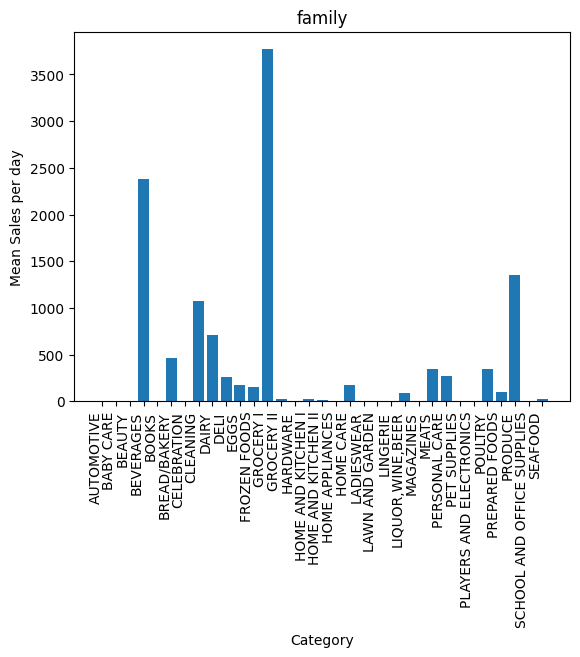

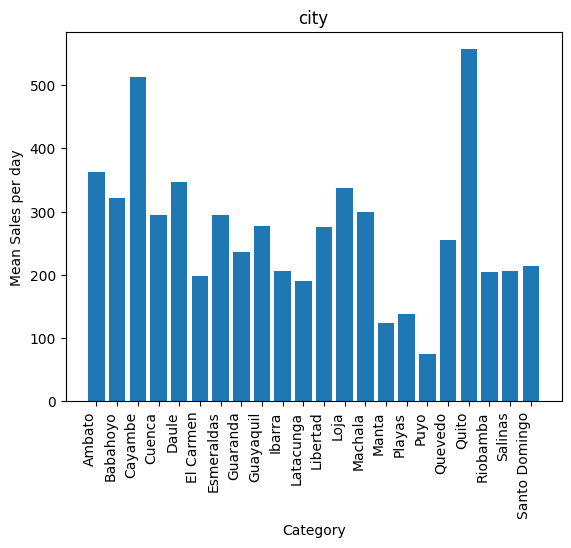

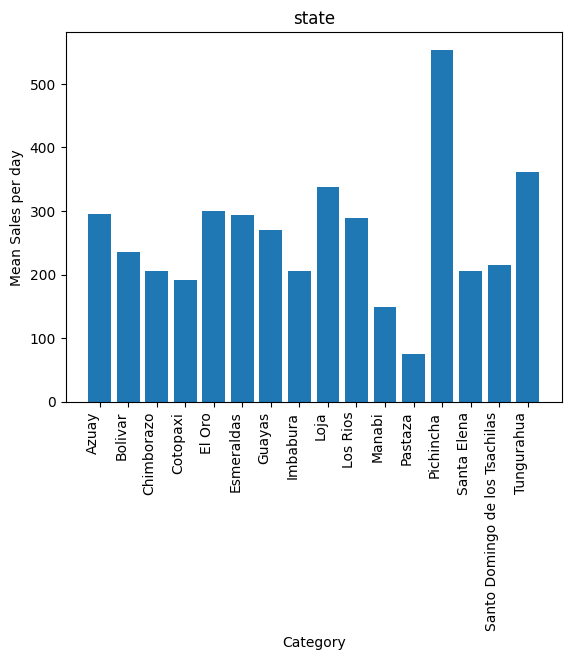

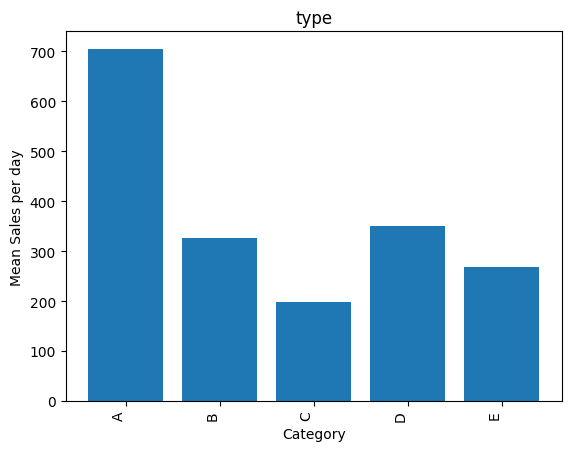

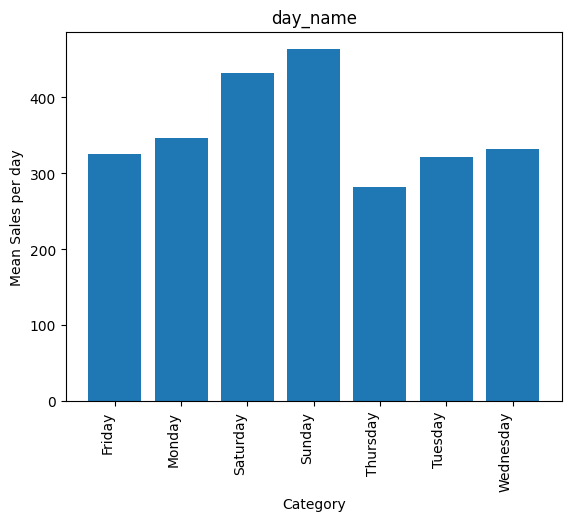

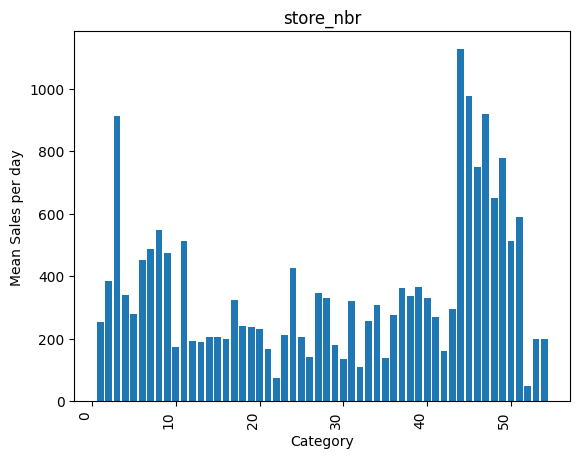

In [62]:
for col in cat_features:
    mean_sales_by_cat_feature = train.groupby(col)[target].mean()
    plt.bar(mean_sales_by_cat_feature.index, mean_sales_by_cat_feature.values)
    plt.title(col)
    plt.xlabel('Category')
    plt.xticks(rotation=90, ha='right')
    plt.ylabel('Mean Sales per day')
    plt.show()